In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Step 1: Load the 20 Newsgroups Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [3]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts, labels = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names

print(f"Number of documents: {len(texts)}")
print(f"Number of categories: {len(target_names)}")
print("Sample category:", target_names[labels[0]])
print("Sample text:", texts[0][:500])

Number of documents: 18846
Number of categories: 20
Sample category: rec.sport.hockey
Sample text: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a


## Step 2: Data Quality Assessment

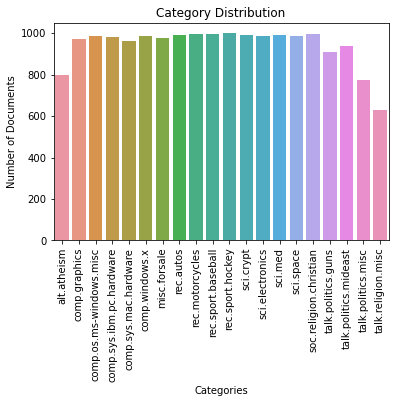

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

category_counts = np.bincount(labels)
sns.barplot(x=target_names, y=category_counts)
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Number of Documents")
plt.title("Category Distribution")
plt.show()

In [5]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts, labels = newsgroups.data, newsgroups.target

# Convert to a DataFrame for easier analysis
data_df = pd.DataFrame({"text": texts, "label": labels})

# Check for missing or empty documents
missing_count = data_df["text"].isnull().sum()
empty_count = data_df["text"].apply(lambda x: len(x.strip()) == 0).sum()

print(f"Total documents: {len(data_df)}")
print(f"Missing documents: {missing_count}")
print(f"Empty documents: {empty_count}")

Total documents: 18846
Missing documents: 0
Empty documents: 515


In [6]:
# Check label consistency
unique_labels = np.unique(labels)
expected_labels = set(range(len(newsgroups.target_names)))

print("Unique labels in the dataset:", unique_labels)
print("Expected labels:", expected_labels)
print("Are all labels consistent?", set(unique_labels) == expected_labels)

Unique labels in the dataset: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Expected labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Are all labels consistent? True


In [7]:
import random

# Display a few random samples with their labels
random_samples = random.sample(range(len(data_df)), 5)
for idx in random_samples:
    print(f"Label: {newsgroups.target_names[data_df['label'][idx]]}")
    print(f"Text: {data_df['text'][idx][:500]}")  # Display first 500 characters
    print("=" * 80)

Label: rec.sport.hockey
Text: Ten years ago, the number of Europeans in the NHL was roughly a quarter
of what it is now. Going into the 1992/93 season, the numbers of Euros on
NHL teams have escalated to the following stats:

Canadians: 400
Americans: 100
Europeans: 100

   Please note that these numbers are rounded off, and taken from the top
25 players on each of the 24 teams. My source is the Vancouver Sun.

   Here's the point: there are far too many Europeans in the NHL. I am sick
of watching a game between an American 
Label: sci.electronics
Text: I have a project in mind that requires an array of LEDs that can be addressed
individually by a microprocessor (say, 16x16 or so).  Is there an LSI that
is designed to drive an LED array (including RAM to hold the array state),
or failing that, some way of multiplexing the display so I don't have to
latch a bit for each LED using a discrete latch?  (I want to avoid having
a huge board covered with 373s if possible!)  Thanks in advance..

## Step 3: Data Cleaning

In [8]:
pip install nltk spacy

  Using cached spacy-3.8.2-cp39-cp39-win_amd64.whl (12.3 MB)
  Using cached weasel-0.4.1-py3-none-any.whl (50 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached preshed-3.0.9-cp39-cp39-win_amd64.whl (122 kB)
  Using cached cymem-2.0.10-cp39-cp39-win_amd64.whl (39 kB)
  Using cached murmurhash-1.0.11-cp39-cp39-win_amd64.whl (25 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl (182 kB)
  Using cached thinc-8.3.2-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached typer-0.15.1-py3-none-any.whl (44 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl (27 kB)
  Using cached language_data-1.3.0-py3-none-any.whl (5.4 MB)
  Using cached marisa_trie-1.2.1-cp39-cp39-win_amd64.whl (152 kB)
  Using cached confection-0.1.5-py3-none-any.whl (35 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached blis-1.0.1-cp39-cp39-win_amd64.whl (6.4 MB)
  Using cached cloudpathlib-0.20.0-py3-none-any.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\anaconda\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Tokenize
    words = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    return " ".join(words)

texts_cleaned = [clean_text(doc) for doc in texts]

[nltk_data] Downloading package punkt to C:\Users\Benjamin Bui-
[nltk_data]     Dang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Benjamin Bui-
[nltk_data]     Dang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 4: Data Preprocessing

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts_cleaned)

print("Shape of feature matrix:", X.shape)

Shape of feature matrix: (18846, 5000)


## Step 5: Split Data for Training and Testing 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (15076, 5000)
Testing set size: (3770, 5000)



## Step 6: Bias Detection and Mitigation

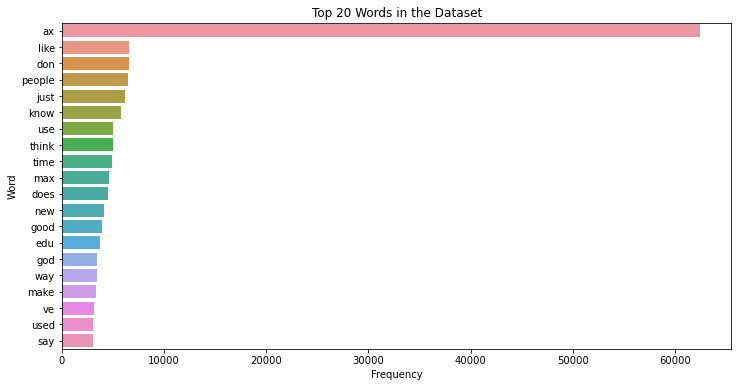

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the dataset
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)
word_counts = X.toarray().sum(axis=0)

# Get top words
top_words = pd.DataFrame({"word": vectorizer.get_feature_names_out(), "count": word_counts}).sort_values(by="count", ascending=False)

# Plot top words
plt.figure(figsize=(12, 6))
sns.barplot(x="count", y="word", data=top_words.head(20))
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Words in the Dataset")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [14]:
pip install imbalanced-learn


  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.22.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [15]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split data
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print(f"Original Training Data Size: {X_train.shape[0]}")
print(f"Resampled Training Data Size: {X_train_resampled.shape[0]}")

Original Training Data Size: 15076
Resampled Training Data Size: 16560


In [16]:
pip install nlpaug

Note: you may need to restart the kernel to use updated packages.


In [17]:
import nlpaug.augmenter.word as naw

aug = naw.SynonymAug(aug_src='wordnet', aug_min=1, aug_max=3)
augmented_text = aug.augment(texts[0])
print("Original Text:", texts[0])
print("Augmented Text:", augmented_text)

Original Text: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


Augmented Text: ["I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am bit puzzled too and a bit relieved. However, I am going to put an end to non - PIttsburghers ' relief

## Step 7: Build a Classification Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.51      0.50      0.50       151
           comp.graphics       0.61      0.58      0.60       202
 comp.os.ms-windows.misc       0.59      0.54      0.56       195
comp.sys.ibm.pc.hardware       0.55      0.58      0.57       183
   comp.sys.mac.hardware       0.68      0.64      0.66       205
          comp.windows.x       0.74      0.70      0.72       215
            misc.forsale       0.71      0.72      0.71       193
               rec.autos       0.62      0.65      0.64       196
         rec.motorcycles       0.38      0.68      0.49       168
      rec.sport.baseball       0.71      0.75      0.73       211
        rec.sport.hockey       0.90      0.81      0.86       198
               sci.crypt       0.81      0.68      0.74       201
         sci.electronics       0.54      0.56      0.55       202
                 sci.med       0.77      0.76      0.76       194
         

## Step 8: Data Visualization

In [19]:
pip install wordcloud

In [20]:
pip install --upgrade pillow

Note: you may need to restart the kernel to use updated packages.


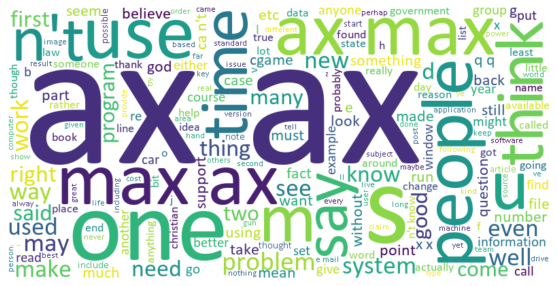

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the path to a TrueType font file
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    font_path='C:/Windows/Fonts/Calibri.ttf'  # Update this to a valid path on your system
).generate(" ".join(texts_cleaned))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [22]:
# Remove missing or empty rows
data_cleaned = data_df.dropna().query("text.str.strip() != ''", engine='python')

# Save to a CSV file
data_cleaned.to_csv("20newsgroups_cleaned.csv", index=False)

print(f"Cleaned dataset saved. Remaining documents: {len(data_cleaned)}")

Cleaned dataset saved. Remaining documents: 18331
